A notebook for configuring the cameras of each channel of the Kameda Lab Orochi Simulator.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Overview

This notebook guides the user through connection to each of the channels of the OROCHI simulator, and gives prompts for recording the channel number, the centre-wavelength, full-width-at-half-maximum, f-number, and region-of-interest of sample area, associated with each channel camera system, indexed by serial number.

First we write a look-up-table of camera properties, and then we will attach the serial number of the associated camera to the camera properties.

The steps are:
1. Get list of serial numbers of devices connected.
For each device:
2. Begin live feed
3. Establish position of camera in rig (manual)
4. Prompt user to enter camera number
5. Assign serial number to camera number
6. Write look-up-table of properties of camera number, and add serial number
7. Automatically set region of interest
8. Check region of interest
9. Write region of interest to properties

# Camera Properties

There are 8 OROCHI channels, labelled 1 - 8, with band 8 as the monochromatic band.

| Band | CWL (nm) | FWHM (nm) | f# |
|------|----------|-----------|----|
| 1    | 400      | 50        |6.4 |
| 2    | 475      | 25        |6.4 |
| 3    | 550      | 25        |6.4 |
| 4    | 650      | 50        |6.4 |
| 5    | 725      | 50        |6.4 |
| 6    | 850      | 50        |6.2 |
| 7    | 950      | 50        |5.8 |
| 8    | 550      | 250       |6.4 |

These f-numbers are for the equivalent OROCHI FM channels, from the Kameda et al 2021 paper. I need to verify that the same are used for the simulator.
Note that these values are not currently used in the processing, but recorded in the metadata for future reference.

We store this information in a dictionary of dictionaries, labelled by band name, but we will replace these labels with the device name of each camera.

In [2]:
cameras = {
          'DMK 33GX249 23120778':
             {'number': 7,
              'serial': 23120778,
              'position': 1,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 550.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              }, 
        'DMK 33GX249 10910295':
             {'number': 5,
              'serial': 10910295,
              'position': 2,
              'fnumber': 5.8,
              'flength': 12.5E-3,
              'cwl': 950.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910289':
             {'number': 2,
              'serial': 10910289,
              'fnumber': 6.4,
              'position': 3,
              'flength': 12.5E-3,
              'cwl': 400.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910291':
             {'number': 4,
              'serial': 10910291,
              'position': 4,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 725.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },  
        'DMK 33GX249 10910265':
             {'number': 6,
              'serial': 10910265,
              'position': 5,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 650.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },    
        'DMK 33GX249 10910294':
             {'number': 3,
              'serial': 10910294,
              'position': 6,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 550.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910273':
             {'number': 1,
              'serial': 10910273,
              'position': 7,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 475.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910288':
             {'number': 0,
              'serial': 10910288,
              'position': 8,
              'fnumber': 6.2,
              'flength': 12.5E-3,
              'cwl': 850.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              }
       }


# Getting the list of available cameras

Here we connect to the available cameras, and get a list of their names.

In [3]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
connected_cameras = osc.connect_cameras(ic, cameras)
osc.configure_cameras(connected_cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Brightness Value set to 0
Contrast Value set to 0
Sharpness Value set to 0
Gamma Value set to 100
Gain Value set to 4.269999980926514
Gain Auto set to 0
Exposure Value set to 0.009999999776482582
Exposure Auto set to 1
Exposure Auto Reference set to 80
Exposure Auto Max Value set to 10.0
Expo

# Setting Region of Interest

The sample typically occupies only a small portion of the image, so it is useful to record this region of interest for future use.

We can do this by simply finding the brightest pixel after blurring, and centering a 128 x 128 window around this.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Exposure Auto set to 0
Exposure Value set to 0.00019999999494757503
Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved
x: 568
y: 684


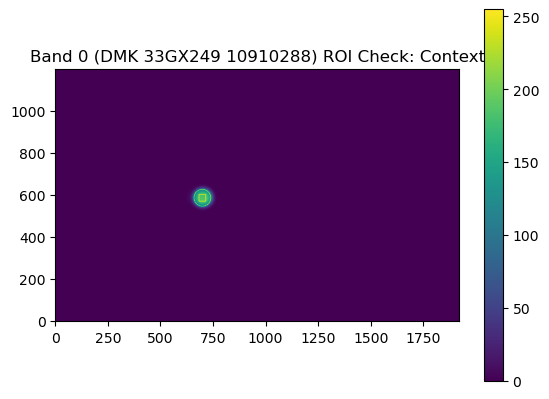

Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved


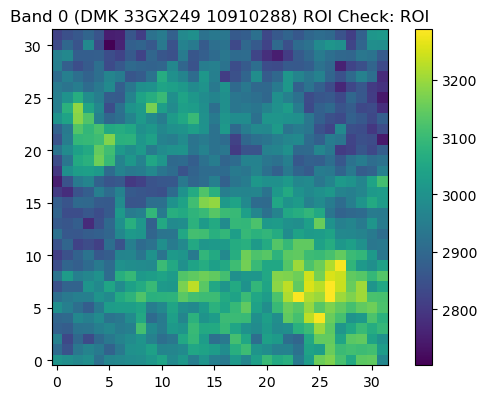

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Exposure Auto set to 0
Exposure Value set to 0.00019999999494757503
Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved
x: 248
y: 688


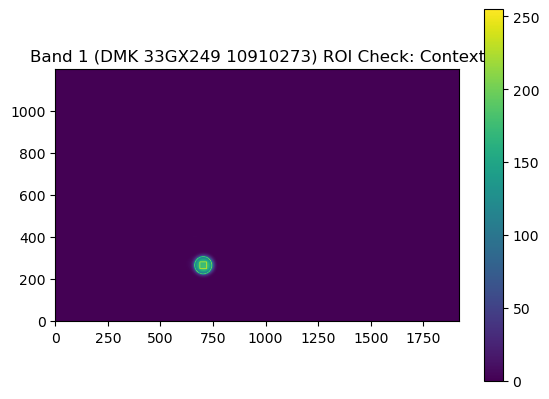

Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved


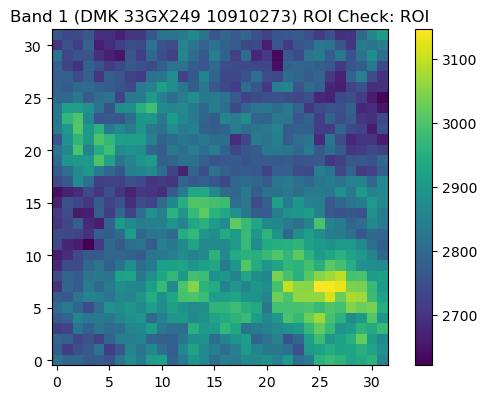

-----------------------------------
-----------------------------------
Device 2 (DMK 33GX249 10910289)
-----------------------------------
Exposure Auto set to 0
Exposure Value set to 0.00019999999494757503
Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved
x: 880
y: 1248


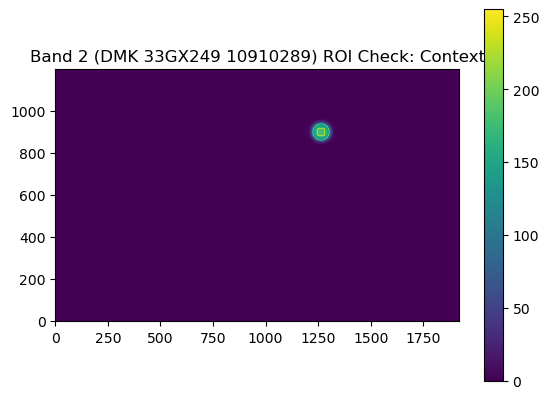

Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved


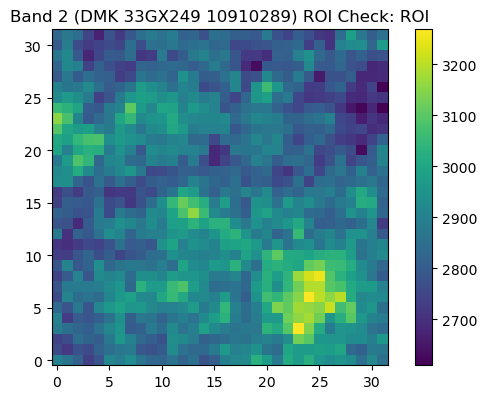

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Exposure Auto set to 0
Exposure Value set to 0.00019999999494757503
Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved
x: 258
y: 982


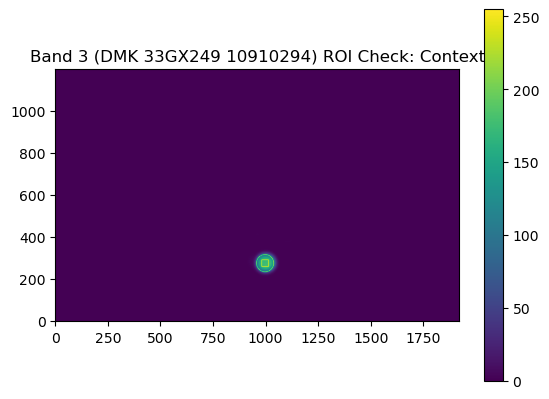

Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved


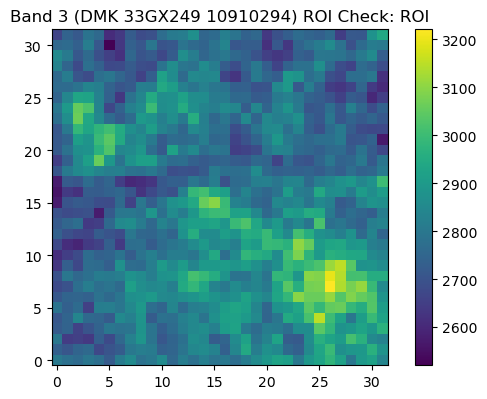

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Exposure Auto set to 0
Exposure Value set to 0.00019999999494757503
Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved
x: 580
y: 1238


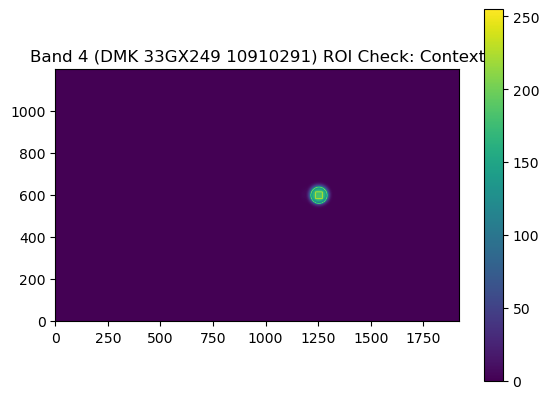

Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved


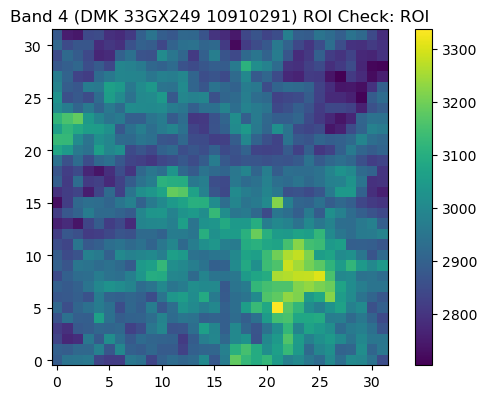

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Exposure Auto set to 0
Exposure Value set to 0.00019999999494757503
Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved
x: 880
y: 950


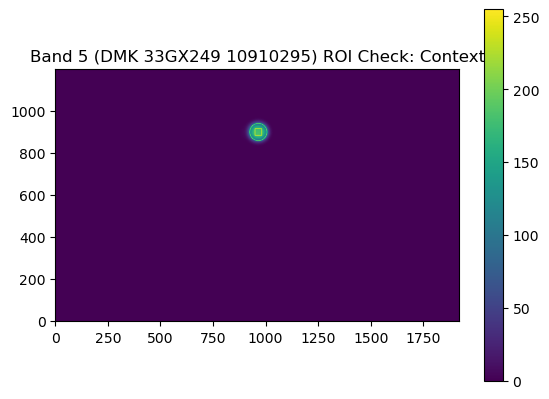

Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved


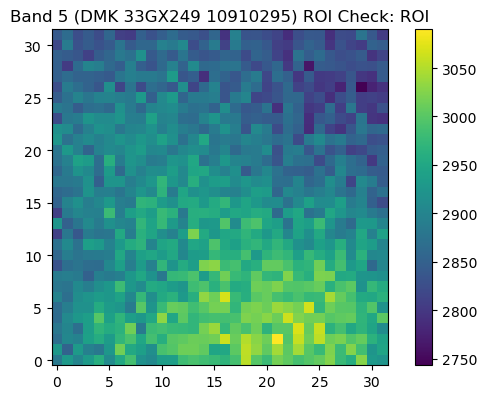

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Exposure Auto set to 0
Exposure Value set to 0.00019999999494757503
Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved
x: 870
y: 632


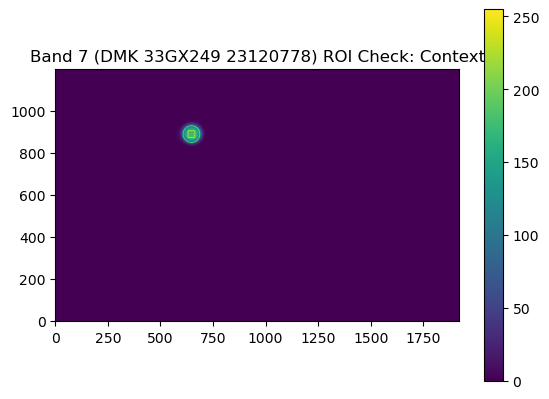

Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved


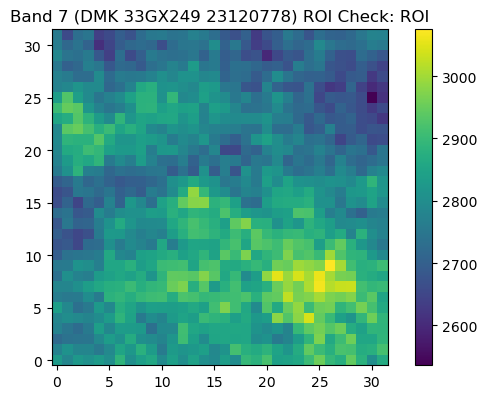

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Exposure Auto set to 0
Exposure Value set to 0.00019999999494757503
Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved
x: 242
y: 1254


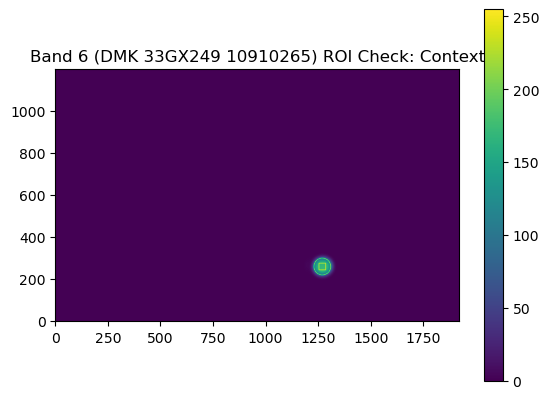

Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved


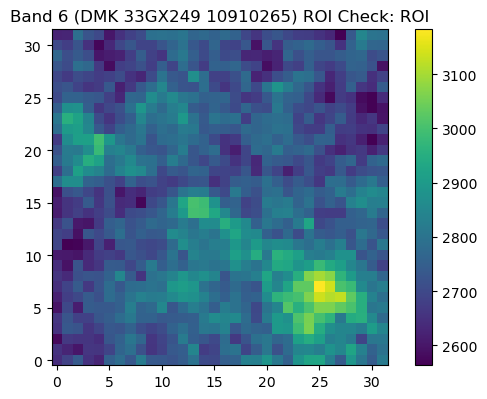

-----------------------------------


In [14]:
cameras = osc.find_camera_rois(connected_cameras, roi_size=32)

# Setting the F-Number

To set our cameras for the given f-numbers, we need to:
- set the lens ring f-number to the minimum of f/1.4
- establish all camera have same throughput at f/1.4
- get the exposure required to image the reflectance target to a given exposure (approx. 3700 DN) with high precision
- compute the exposure required to achieve the same level for the target f-number
- repeatedly adjust the ring until the value has been met.

In [ ]:
osc.check_f_numbers(connected_cameras)

In [22]:
osc.set_f_numbers(connected_cameras)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.00019999999494757503
Trial 0:
Imaging with Exposure: 0.0001990000018849969 s
+Good exposure 0.0001990000018849969 Image recieved
Quantile: 3224.0, Target: 3275.2000000000003
Exposure current Value: 0.0001990000018849969
Exposure Value set to 0.00020216029952280223
Exposure set to 0.00020199999562464654 (err of 1.603040570351906e-07
Trial 1:
Imaging with Exposure: 0.00020199999562464654 s
+Good exposure 0.00020199999562464654 Image recieved
Quantile: 3718.0, Target: 3275.2000000000003
Exposure current Value: 0.00020199999562464654
Exposure Value set to 0.00017794255109038204
Exposure set to 0.00017699999443721026 (err of 9.425514664590377e-07
Trial 2:
Imaging with Exposure: 0.00017699999443721026 s
+Good exposure 0.00017699999443721026 Image recieved
Quantile: 3239.0, Target: 3275.2000000000003
Exposure current Value: 0.00017699999443721026
E

# Set Focus

In [ ]:
osc.set_focus(connected_cameras)